# Elastica

We first find the value of $K$ in the following equation:
\begin{gather}
\frac{P}{P_{\rm Euler}} = \frac{2}{\pi} \int_0^{\pi/2} \frac{{\rm d} \varphi}{\sqrt{1-K^2 \sin^2 \varphi}} \tag{1}
\end{gather}

To evaluate the complete elliptic integral of the first kind, we use the built-in `ellipk` function within `scipy.special`. 

In [1]:
import numpy as np
from scipy.special import ellipk

In [2]:
P_by_PE = 1.1

def elastica_fun(K):
    return np.sqrt(P_by_PE) - 2/np.pi*ellipk(K)

In [3]:
elastica_fun(0.75)

-0.32407165244819836

Text(0, 0.5, 'residual')

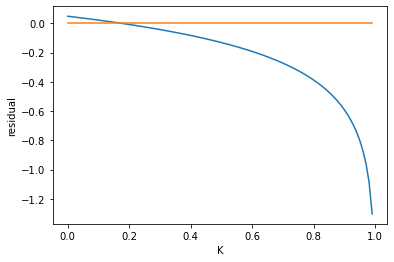

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

K_values = np.arange(0,1,0.01)
elastica_fun(K_values)

plt.plot(K_values,elastica_fun(K_values))
plt.plot(K_values,np.zeros(len(K_values)))
plt.xlabel('K')
plt.ylabel('residual')

The above plot shows approximately where the RHS of Eq. (1) intersects the value of $\displaystyle \frac{P}{P_{\rm Euler}}$. We find the refined solution through the root finding capability of SciPy as follows: 

In [5]:
from scipy.optimize import root

In [6]:
soln = root(elastica_fun,0.6)
soln

    fjac: array([[-1.]])
     fun: array([-2.22044605e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.52917679e-11])
       r: array([0.31033766])
  status: 1
 success: True
       x: array([0.17547397])

In [7]:
K_soln = soln.x[0]
K_soln

0.17547397230811854

In [8]:
elastica_fun(K_soln)

-2.220446049250313e-16

Finally, we obtain the deflection values using
\begin{gather}
w = \frac{2}{\pi}\sqrt{\frac{P_{\rm Euler}}{P}(K^2 - \sin^2 \frac{\theta}{2})} \tag{2} \\
\text{or,} \quad w = \frac{2}{\pi}\sqrt{\frac{P_{\rm Euler}}{P}(K^2 - K^2 \sin^2 \varphi)}, \tag{3}
\end{gather}
where we use $\displaystyle \sin \frac{\theta}{2} = K \sin \varphi$.

We note that $\theta = \pm \alpha \implies \varphi = \pm\pi/2$ and $\theta = 0 \implies \varphi = 0$. So when $\theta$ goes from $-\alpha$ to $\alpha$ through $0$, $\varphi$ goes from $\displaystyle -\frac{\pi}{2}$ to $\displaystyle \frac{\pi}{2}$ through 0. 

(-1.727090561310988,
 1.7113825980430213,
 -0.00532557484150375,
 0.11183707167157875)

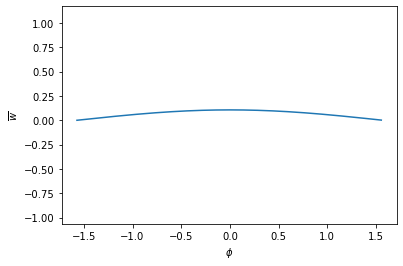

In [9]:
n = 200
phi = np.arange(-np.pi/2,np.pi/2,np.pi/n)

wbar = 2/np.pi*np.sqrt(1/P_by_PE)*np.sqrt(K_soln**2 - K_soln**2*np.sin(phi)**2)

plt.plot(phi,wbar)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\overline{w}$')
plt.axis('equal')